**Table of contents**<a id='toc0_'></a>    
- [EXAM CODES](#toc1_)    
    - [Canny Edge Detection](#toc1_1_1_)    
    - [Evaluating impact of Gaussian using PSNR (Peak Signal to Noise Ratio)](#toc1_1_2_)    
  - [Sharpening an image and calculating PSNR to compare](#toc1_2_)    
  - [Gaussian Filtering vs Median Filtering wrt PSNR](#toc1_3_)    
  - [Performance Evaluation of the SIFT and ORB Feature Detection Algorithms](#toc1_4_)    
  - [Evaluating Performance of K-Nearest Neighbor (KNN) and Support Vector Machine (SVN)](#toc1_5_)    
  - [Evaluating performance of Region splitting and Thresholding Segmentation with intersection over Union (IoU) as performance metrics](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[EXAM CODES](#toc0_)

### <a id='toc1_1_1_'></a>[Canny Edge Detection](#toc0_)

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

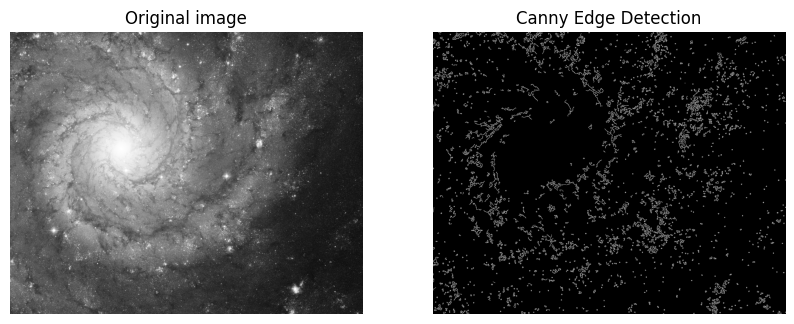

In [3]:
image = cv2.imread("image_1.jpg" , cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image , (5 , 5) , 0)   
#Here 5 , 5 tells us the size of filter (5x5) and
# 0 represents grayscale image
edges = cv2.Canny(blurred_image , threshold1 = 50 , threshold2 = 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

### <a id='toc1_1_2_'></a>[Evaluating impact of Gaussian using PSNR (Peak Signal to Noise Ratio)](#toc0_)

In [4]:
#PSNR before Gaussian Blur/Smoothing
image = cv2.imread("image_1.jpg" , cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image , (5 , 5) , 0)   
#Here 5 , 5 tells us the size of filter (5x5) and
# 0 represents grayscale image
psnr_before = cv2.PSNR(image , image)
psnr_after = cv2.PSNR(image , blurred_image)
print(f'PSNR before Gaussian smoothing: {psnr_before:.2f} dB')
print(f'PSNR after Gaussian smoothing: {psnr_after:.2f} dB')

PSNR before Gaussian smoothing: 361.20 dB
PSNR after Gaussian smoothing: 28.37 dB


## <a id='toc1_2_'></a>[Sharpening an image and calculating PSNR to compare](#toc0_)

PSNR before Gaussian smoothing: 361.20 dB
PSNR after Gaussian smoothing: 17.94 dB


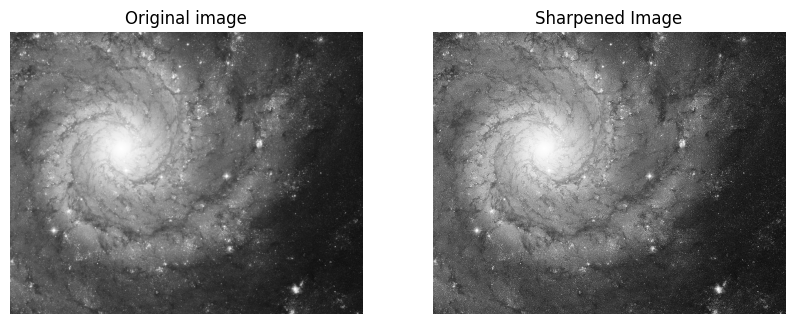

In [5]:
image = cv2.imread("image_1.jpg" , cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image , (5 , 5) , 0)   
#Here 5 , 5 tells us the size of filter (5x5) and
# 0 represents grayscale image
psnr_before = cv2.PSNR(image , image)
sharpening_kernel = np.array([[0 , -1 , 0] , 
                            [-1 , 5 , -1],
                            [0 , -1 , 0]])
sharpened_image = cv2.filter2D(image , -1 , sharpening_kernel)
psnr_after = cv2.PSNR(image , sharpened_image)
print(f'PSNR before Gaussian smoothing: {psnr_before:.2f} dB')
print(f'PSNR after Gaussian smoothing: {psnr_after:.2f} dB')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.show()

## <a id='toc1_3_'></a>[Gaussian Filtering vs Median Filtering wrt PSNR](#toc0_)

PSNR for Median Filtered Image: 25.95 dB
PSNR for Gaussian Filtered Image: 28.37 dB


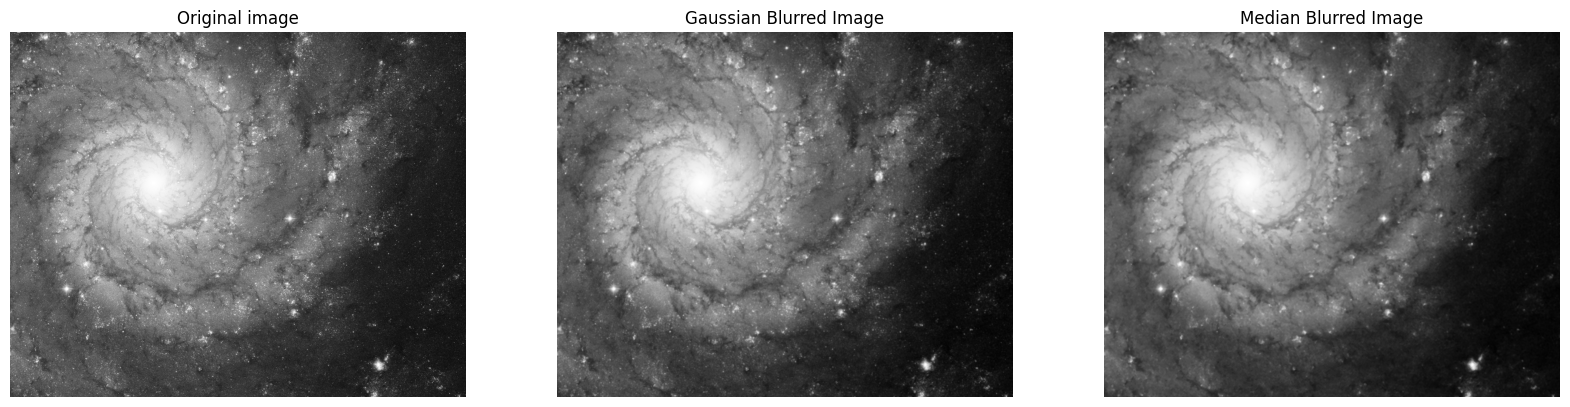

In [5]:
def calc_psnr(original , filtered) :
    return cv2.PSNR(original , filtered)

median_filtered_image = cv2.medianBlur(image , 5)    
#Size of kernel is 5
gaussian_filtered_image = cv2.GaussianBlur(image , (5 , 5) , 0)
psnr_median = calc_psnr(image , median_filtered_image)
psnr_gaussian = calc_psnr(image , gaussian_filtered_image)

print(f"PSNR for Median Filtered Image: {psnr_median:.2f} dB")
print(f"PSNR for Gaussian Filtered Image: {psnr_gaussian:.2f} dB")

plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Median Blurred Image')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')


plt.show()

## <a id='toc1_4_'></a>[Performance Evaluation of the SIFT and ORB Feature Detection Algorithms](#toc0_)

Number of key points detected by SIFT: 4014
Number of key points detected by ORB: 500


(-0.5, 1279.5, 1023.5, -0.5)

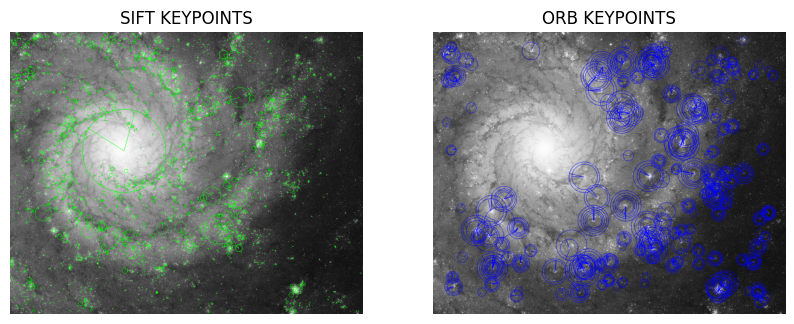

In [6]:
image = cv2.imread('image_1.jpg' , cv2.IMREAD_GRAYSCALE)

#initialize SIFT Detector
sift = cv2.SIFT_create()

#Detect Keypoints and descriptors with SIFT
sift_keypoints , sift_descriptors = sift.detectAndCompute(image , None)
num_sift_keypoints = len(sift_keypoints)

#Initialize ORB Detector
orb = cv2.ORB_create()

#Detect Keypoints and descriptors with ORB
orb_keypoints , orb_descriptors = orb.detectAndCompute(image , None)
num_orb_keypoints = len(orb_keypoints)

print(f"Number of key points detected by SIFT: {num_sift_keypoints}")
print(f"Number of key points detected by ORB: {num_orb_keypoints}")

#Visualize the keypoints
sift_image = cv2.drawKeypoints(image , sift_keypoints , None , 
                color = (0 , 255 , 0) , 
                flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

orb_image = cv2.drawKeypoints(image , orb_keypoints , None , 
            color = (0 , 0 , 255) , 
            flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        
#Display images
plt.figure(figsize = (10 , 5))
plt.subplot(1 , 2 , 1)
plt.title("SIFT KEYPOINTS")
plt.imshow(sift_image , cmap = 'gray')
plt.axis('off')

plt.subplot(1 , 2 , 2)
plt.title("ORB KEYPOINTS")
plt.imshow(orb_image , cmap = 'gray')
plt.axis('off')

## <a id='toc1_5_'></a>[Evaluating Performance of K-Nearest Neighbor (KNN) and Support Vector Machine (SVN)](#toc0_)

In [7]:
%pwd

'/home/vaishnav/Desktop/Image Processing Stuff'

In [8]:

%%time
#Import all the required modules

import cv2
import os
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

CPU times: user 2.19 s, sys: 49.1 ms, total: 2.23 s
Wall time: 629 ms


In [9]:
%%time
import os
import cv2
import numpy as np

def load_data(data_directory):
    images = []    # Create empty list for images and labels
    labels = []

    # Loop over each label folder
    for label in os.listdir(data_directory):
        label_path = os.path.join(data_directory, label)
        
        # Ensure the path is a directory
        if not os.path.isdir(label_path):
            continue
        
        # Loop over each image file in the label directory
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            
            # Attempt to load the image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Warning: Unable to load image at {img_path}.")
                continue
            
            # Resize the image and flatten it for appending
            try:
                img = cv2.resize(img, (128, 128))
            except Exception as e:
                print(f"Error resizing image {img_path}: {e}")
                continue
            
            images.append(img.flatten())
            labels.append(label)
    
    return np.array(images), np.array(labels)


CPU times: user 4 μs, sys: 1e+03 ns, total: 5 μs
Wall time: 7.15 μs


In [10]:
%%time
#Load the Dataset
dataset_dir = "COVID-19_Lung_CT_Scans"
X , y = load_data(dataset_dir)

#Split the data into training and testing sets 
#Keep 80% for training and 20% for testing
X_train , X_test , y_train , y_test = train_test_split(X , y , 
                                test_size = 0.2 , random_state = 42)

#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

CPU times: user 14.9 s, sys: 828 ms, total: 15.7 s
Wall time: 16.8 s


In [11]:
%%time
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test , knn_predictions)

CPU times: user 16.3 s, sys: 14 ms, total: 16.3 s
Wall time: 1.65 s


In [12]:
%%time
#SVM Classifier
svm_classifier = svm.LinearSVC()  
#Linear Kernel optimized for large datasets
svm_classifier.fit(X_train , y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test , svm_predictions)

In [ ]:
#Accuracy Scores
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

KNN Accuracy: 97.16%
SVM Accuracy: 99.82%


## <a id='toc1_6_'></a>[Evaluating performance of Region splitting and Thresholding Segmentation with intersection over Union (IoU) as performance metrics](#toc0_)

There is no output for the next cell due to lack of dataset and segmentation masks

```python
#import the modules
import cv2 
import numpy as np 
def region_splitting(image_file) :
    gray = cv2.cvtColor(image_file , cv2.COLOR_BG2GRAY)

    #Apply Adaptive thresholding
    return cv2.adaptiveThreshold(gray , 255 , 
            cv2.ADAPTIVE_THRESH_MEAN_C , 
            cv2.THRESH_BINARY , 11 , 2)


def thresholding(image_file , threshold_value = 127) :
    gray = cv2.cvtColor(image_file , cv2.COLOR_BG2GRAY)

    #Apply simple thresholding
    thresh_image = cv2.threshold(gray , threshold_value , 255 , 
                    cv2.THRESH_BINARY)
    return thresh_image

def calc_iou(pred_mask , true_mask) :
    intersection = np.logical_and(pred_mask , true_mask)  
    '''
        The above line checks which all pixels are the same
        as in AND gate only if the 2 inputs are equal , 
        the output is True
    '''
    union = np.logical_or(pred_mask , true_mask)

    iou = np.sum(intersection)/np.sum(union)
    return iou
#Load the image
image = cv2.imread('image_1.jpg')
true_mask = cv2.imread('ground_truth_mask.png', cv2.IMREAD_GRAYSCALE) // 255 
# Normalize to binary
# Apply segmentation algorithms
region_split_mask = region_splitting(image)
threshold_mask = thresholding(image)

# Calculate IoU for each algorithm
iou_region_split = calculate_iou(region_split_mask // 255, true_mask)  
# Normalize to binary
iou_threshold = calculate_iou(threshold_mask // 255, true_mask)  
# Normalize to binary

# Print IoU values
print(f'IoU for Region Splitting: {iou_region_split:.4f}')
print(f'IoU for Thresholding: {iou_threshold:.4f}')
```